In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
uber_stats= pd.read_csv(r'C:\Users\cupid\Desktop\Python\uber-raw-data-apr14.csv')

In [6]:
uber_stats.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [7]:
uber_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [9]:
print(uber_stats.isnull().sum())

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [10]:
uber_stats['Date/Time'] = pd.to_datetime(uber_stats['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
uber_stats['DayofWeekNum'] = uber_stats['Date/Time'].dt.dayofweek
uber_stats['DayofWeek'] = uber_stats['Date/Time'].dt.strftime('%A')
uber_stats['DayNum'] = uber_stats['Date/Time'].dt.day
uber_stats['HourOfDay'] = uber_stats['Date/Time'].dt.hour

In [11]:
uber_stats.head(10)

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayofWeek,DayNum,HourOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512,1,Tuesday,1,0
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512,1,Tuesday,1,0
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512,1,Tuesday,1,0
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512,1,Tuesday,1,0
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512,1,Tuesday,1,1


In [12]:
uber_weekly_data = uber_stats.pivot_table(index=['DayofWeekNum','DayofWeek'], values ='Base', aggfunc ='count')
uber_weekly_data

,,Base
DayofWeekNum,DayofWeek,
0,Monday,60861
1,Tuesday,91185
2,Wednesday,108631
3,Thursday,85067
4,Friday,90303
5,Saturday,77218
6,Sunday,51251


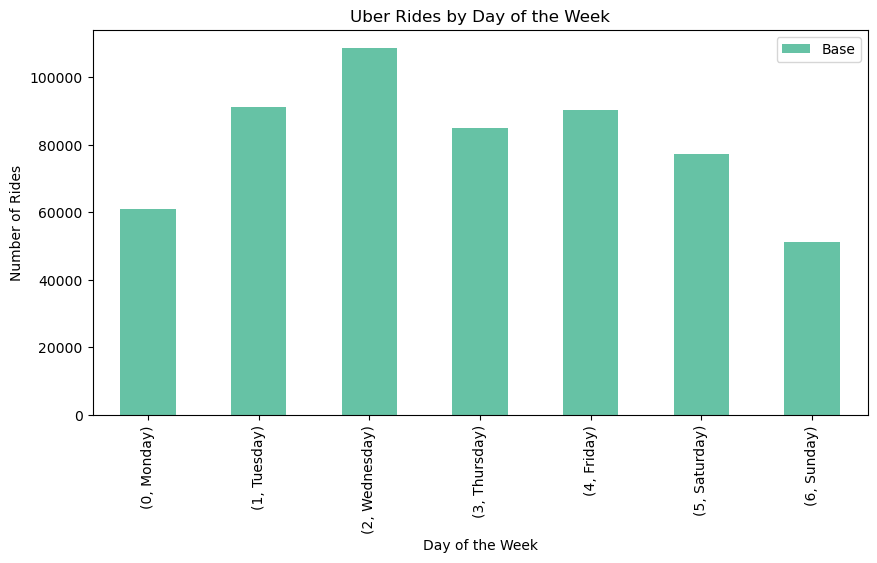

In [15]:
#uber_week_data.plot(kind='bar', figsize=(10,5))
def plot_colored_bar_chart(uber_weekly_data):
    # Define a color palette
    colors = sns.color_palette("Set2", n_colors=len(uber_weekly_data))

    # Plot the bar chart with different colors for each bar
    uber_weekly_data.plot(kind='bar', color=colors, figsize=(10, 5))
    plt.title("Uber Rides by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Number of Rides")
    plt.show()

# Call the function
plot_colored_bar_chart(uber_weekly_data)

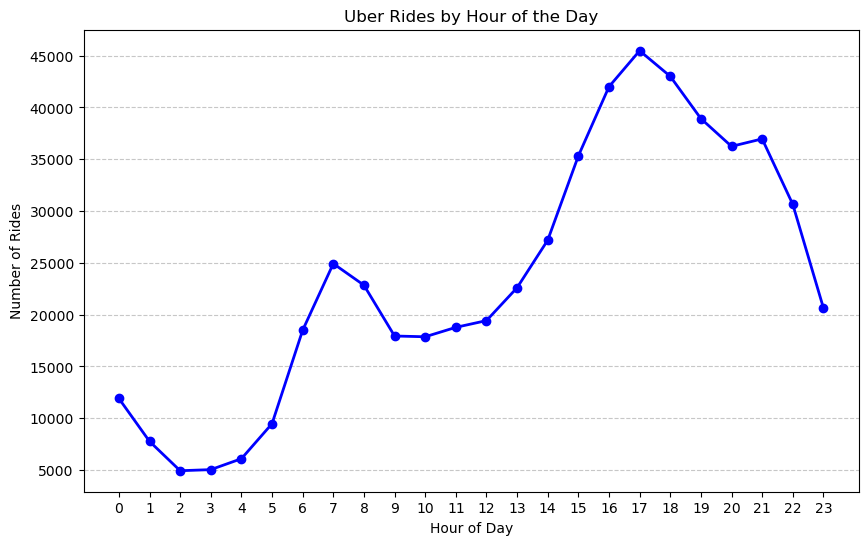

In [18]:



def plot_hour_of_day_line_graph(uber_stats):
    # Group by 'HourOfDay' and count the number of rides in each hour
    hourly_data = uber_stats['HourOfDay'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    hourly_data.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=2)
    plt.title("Uber Rides by Hour of the Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Rides")
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Call the function
plot_hour_of_day_line_graph(uber_stats)

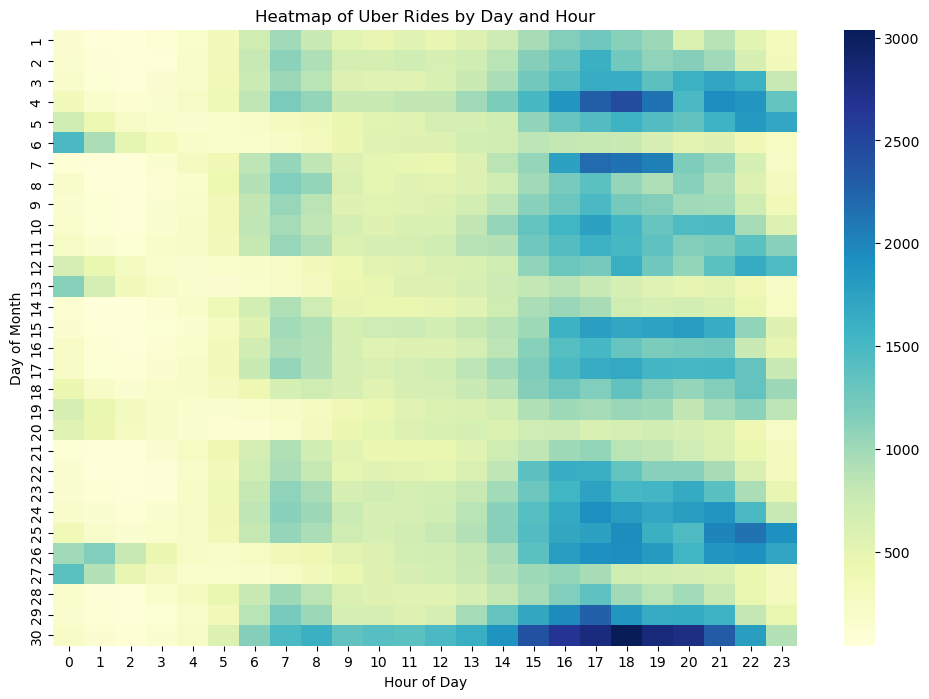

In [20]:
def plot_heatmap_day_hour(uber_stats):
    # pivot table to count rides by DayNum and HourOfDay
    day_hour_data = uber_stats.pivot_table(index='DayNum', columns='HourOfDay', values='Base', aggfunc='count')

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(day_hour_data, cmap='YlGnBu', annot=False, cbar=True)
    plt.title("Heatmap of Uber Rides by Day and Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Month")
    plt.show()

# Call the function
plot_heatmap_day_hour(uber_stats)